### Installations

In [ ]:
!pip install torch==2.4.1 torchvision==0.19.1 --extra-index-url https://download.pytorch.org/whl/cu124

In [8]:
!git clone https://github.com/luca-medeiros/lang-segment-anything && cd lang-segment-anything
!pip install -e .

Cloning into 'lang-segment-anything'...
remote: Enumerating objects: 462, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 462 (delta 152), reused 119 (delta 113), pack-reused 243 (from 3)
Receiving objects: 100% (462/462), 27.78 MiB | 39.08 MiB/s, done.
Resolving deltas: 100% (212/212), done.
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [9]:
import sys
sys.path.append("/content/lang-segment-anything")

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from scipy.ndimage import center_of_mass
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -r lang-segment-anything/requirements.txt

### Loading Model

In [61]:
from PIL import Image
from lang_sam import LangSAM

model = LangSAM()

One or both local paths not provided. Loading from Hugging Face Hub: IDEA-Research/grounding-dino-base


In [63]:
image_url = 'https://media.istockphoto.com/id/1738048835/photo/empty-garage-with-modern-sports-car.webp?a=1&b=1&s=612x612&w=0&k=20&c=US6ulwkcBpvN4lZ8IKADs_elXFA0RXieKKEkUFnryjU='
response = requests.get(image_url)
image_pil = Image.open(BytesIO(response.content)).convert("RGB")
text_prompt = "wheel."

In [64]:
results = model.predict([image], [text_prompt])

Predicting 1 masks
Predicted 1 masks


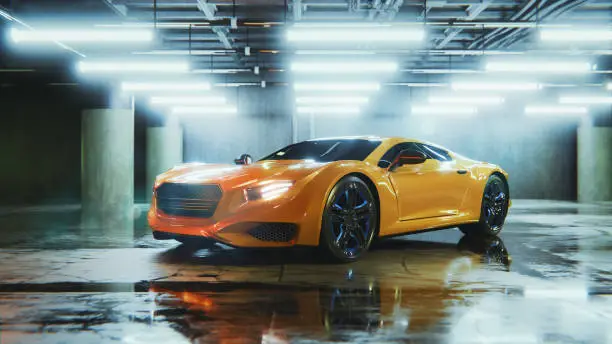

In [65]:
image

In [66]:
display(results)

[{'scores': array([0.8080672, 0.7826625], dtype=float32),
  'boxes': array([[319.42276, 174.44199, 378.8478 , 261.7948 ],
         [458.45694, 172.76506, 510.00385, 236.88525]], dtype=float32),
  'text_labels': ['wheel', 'wheel'],
  'labels': ['wheel', 'wheel'],
  'masks': array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32),
  'mask_scores': array([0.9609375 , 0.92578125], dtype=float32)}]

### Output

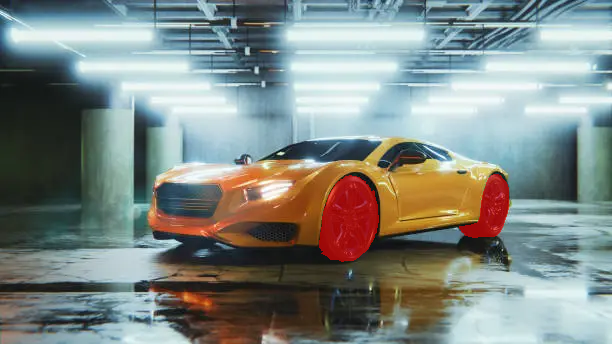

In [67]:
masks = results[0]['masks']
scores = results[0]['scores']
boxes = results[0]['boxes']
labels = results[0]['labels']

masked_image_np = np.array(image_pil.convert('RGBA'))

for mask in masks:
    mask_resized = cv2.resize(mask.astype(np.uint8), (masked_image_np.shape[1], masked_image_np.shape[0]))

    #Creating a colored mask with transparency
    colored_mask = np.zeros_like(masked_image_np)
    colored_mask[mask_resized > 0] = [255, 0, 0, 150]

    alpha = colored_mask[:, :, 3] / 255.0
    for c in range(0, 3):
        masked_image_np[:, :, c] = masked_image_np[:, :, c] * (1 - alpha) + colored_mask[:, :, c] * alpha

masked_image = Image.fromarray(masked_image_np, 'RGBA').convert('RGB')

display(masked_image)